### TITANIC SURVIVAL PREDICTION
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. . The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived..Additionally, Imagine you've been tasked with creating comprehensive documentation for a TITANIC SURVIVAL PREDICTION project.Your documentation should include detailed explanations of the code along with images illustrating the program's execution and user interactions

### Importing the necessary packages 

In [262]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight') 
%matplotlib inline 
warnings.filterwarnings('ignore') 

### Loading dataset
Loading dataset from .csv file using pandas by providing the file path 
Describing the data and the shape of the data

In [263]:
train = pd.read_csv('./Dataset/train.csv') 
test = pd.read_csv('./Dataset/test.csv') 


# To know number of columns and rows 
train.shape 
# (891, 12) 

(891, 12)

### Head Function 
Head Function returns the first "n" rows for the object based on position. By default "n" values is 5.

In [264]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [265]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: ylabel='count'>

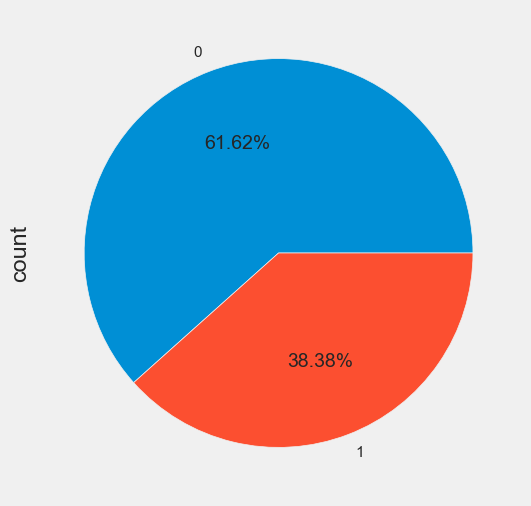

In [267]:
fig = plt.figure(figsize=(6,6))
train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

### Detecting missing values 
Detecting missing values in datasets is critical. Some machine learning algorithms can handle missing data, while others can't. You can remove rows with missing values or replace them with a mean or mode if the attribute isn't significant.

In [268]:
train['Embarked'][train['Embarked'].isnull()]
train['Embarked'][train['Embarked'].isnull()] = train['Embarked'].dropna().mode().values

Assigning a value like 'U0' to nominal attributes can represent absence, as it may convey implicit information. For example, a missing 'Cabin' property could imply no cabin.

In [269]:
train['Cabin'] = train['Cabin'].fillna('U0') 

Use Random Forest models to predict missing attributes. For this dataset, numerical attributes are selected as features for the model.

In [270]:
from sklearn.ensemble import RandomForestRegressor

age_df = train[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train['Age'].notnull())]
age_df_isnull = age_df.loc[(train['Age'].isnull())]
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]
# using RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=-1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])
train.loc[train['Age'].isnull(), ['Age']]= predictAges

In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Survival (men vs female)

In [272]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

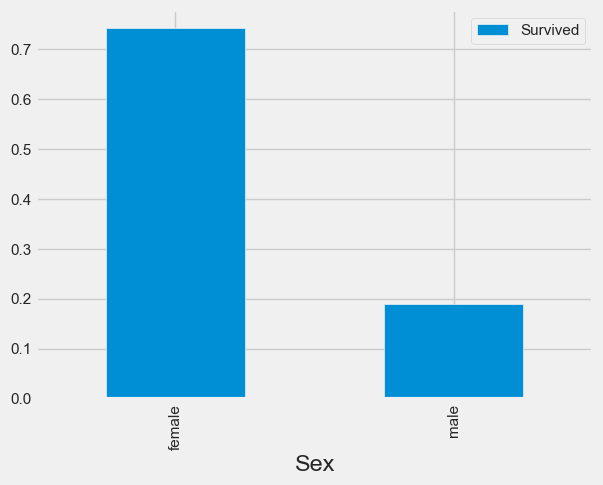

In [273]:
survived_by_sex = train[['Sex','Survived']].groupby('Sex').mean()
type(survived_by_sex)
survived_by_sex.plot.bar()

### Survival (men vs female) sort by Cabin class

In [274]:
train.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass'>

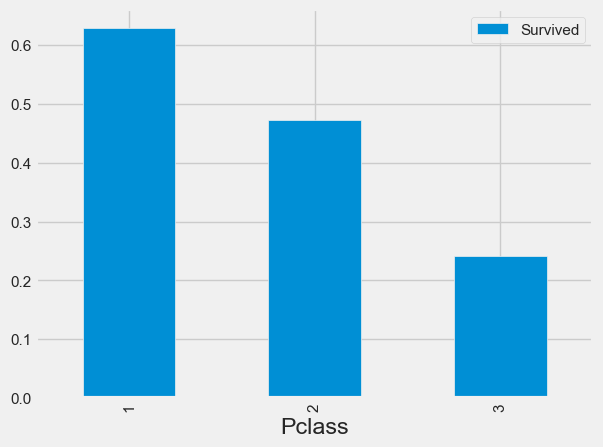

In [275]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [276]:
train.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

<Axes: xlabel='Pclass,Sex'>

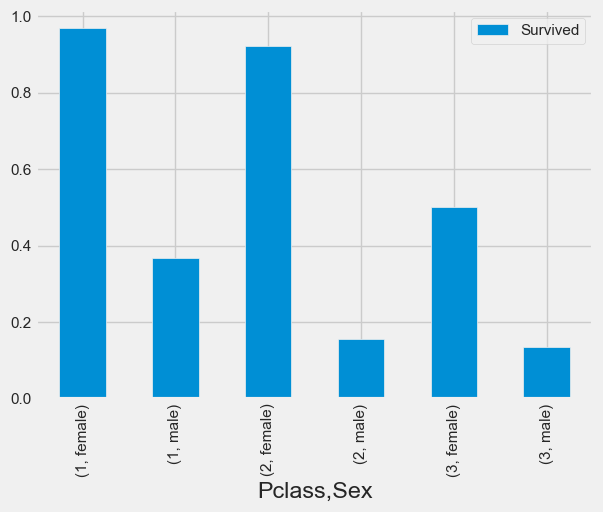

In [277]:
train[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

### Survival (Man vs Female) sort by Age

<Axes: >

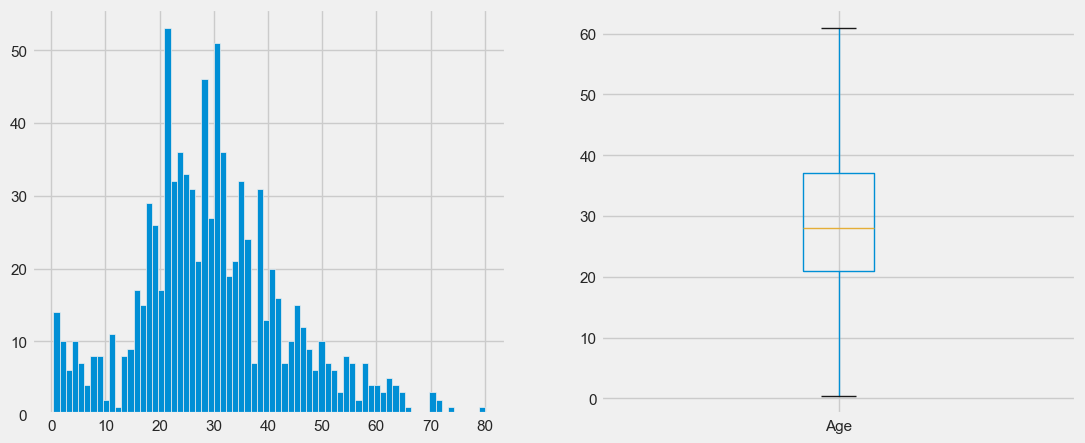

In [278]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train['Age'].hist(bins=70)

plt.subplot(122)
train.boxplot(column='Age', showfliers=False)

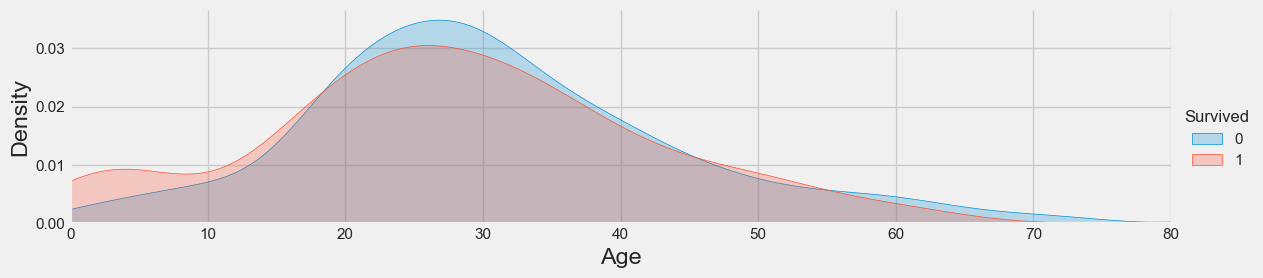

In [279]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()